In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cause_death = pd.read_csv('cause_of_deaths.csv')
cause_death.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [3]:
#can we group by continent first? 
countries_continents = pd.read_csv('countries_continents.csv')

del countries_continents['Unnamed: 0']
countries_continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay
193,South America,Venezuela


In [4]:
#add a col in for continent

for index, row in cause_death.iterrows():

    country = cause_death.loc[index, 'Country/Territory'] 
    #find this country in the count cont file
    
    row_cont = countries_continents.loc[countries_continents['Country'] == country]
    try: 
        cause_death.loc[index, 'Continent'] = row_cont['Continent'].iat[0]
    #leaving out territories for now !
    except IndexError:
        pass
    
    

cause_death

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Continent
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,Africa
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,Africa
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,Africa
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,Africa


In [5]:
df = cause_death.set_index("Continent")
df


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Asia,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
Asia,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
Asia,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
Asia,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
Asia,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Africa,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
Africa,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
Africa,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144


In [6]:
Africa_death = df.loc["Africa"]
Africa_death 

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Algeria,DZA,1990,838,1337,439,453,9,1207,491,...,1743,3559,485,422,13438,4410,2401,3981,1113,486
Africa,Algeria,DZA,1991,794,1411,451,439,9,1136,484,...,1787,3640,469,408,13120,4481,2456,4033,1078,478
Africa,Algeria,DZA,1992,763,1494,470,427,12,1111,497,...,1813,3687,464,396,13115,4571,2500,4083,1071,472
Africa,Algeria,DZA,1993,736,1582,488,417,12,1092,513,...,1840,3741,461,386,13154,4668,2542,4136,1067,470
Africa,Algeria,DZA,1994,708,1675,509,402,8,1086,553,...,1873,3806,460,370,13326,4773,2588,4193,1095,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Africa,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
Africa,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
Africa,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144


In [7]:
Africa_death.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [8]:
unique = Africa_death["Country/Territory"].unique()
unique

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burundi', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Comoros',
       'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

In [9]:
total = Africa_death.sum().to_frame()
total

,0
Country/Territory,AlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlge...
Code,DZADZADZADZADZADZADZADZADZADZADZADZADZADZADZAD...
Year,3006750
Meningitis,4980403
Alzheimer's Disease and Other Dementias,1514433
Parkinson's Disease,391320
Nutritional Deficiencies,4704399
Malaria,17235839
Drowning,821063
Interpersonal Violence,2006328


In [10]:
total = total.iloc[3:]
total

,0
Meningitis,4980403
Alzheimer's Disease and Other Dementias,1514433
Parkinson's Disease,391320
Nutritional Deficiencies,4704399
Malaria,17235839
Drowning,821063
Interpersonal Violence,2006328
Maternal Disorders,2588974
HIV/AIDS,26549815
Drug Use Disorders,70047


In [11]:
total.dtypes

0    object
dtype: object

In [12]:
total.columns=["Populations"]
total

,Populations
Meningitis,4980403
Alzheimer's Disease and Other Dementias,1514433
Parkinson's Disease,391320
Nutritional Deficiencies,4704399
Malaria,17235839
Drowning,821063
Interpersonal Violence,2006328
Maternal Disorders,2588974
HIV/AIDS,26549815
Drug Use Disorders,70047


In [13]:
df = total.apply(pd.to_numeric) 
df

,Populations
Meningitis,4980403
Alzheimer's Disease and Other Dementias,1514433
Parkinson's Disease,391320
Nutritional Deficiencies,4704399
Malaria,17235839
Drowning,821063
Interpersonal Violence,2006328
Maternal Disorders,2588974
HIV/AIDS,26549815
Drug Use Disorders,70047


In [14]:
df.dtypes

Populations    int64
dtype: object

In [15]:
top_causes = df.sort_values(by = 'Populations',ascending = False)
top_ten_causes = top_causes. head(10)
top_ten_causes

,Populations
Cardiovascular Diseases,33727027
HIV/AIDS,26549815
Diarrheal Diseases,23580550
Neonatal Disorders,22399892
Lower Respiratory Infections,22268711
Malaria,17235839
Neoplasms,12422403
Tuberculosis,11778205
Digestive Diseases,9002705
Cirrhosis and Other Chronic Liver Diseases,5827590


Text(0, 0.5, 'Deaths')

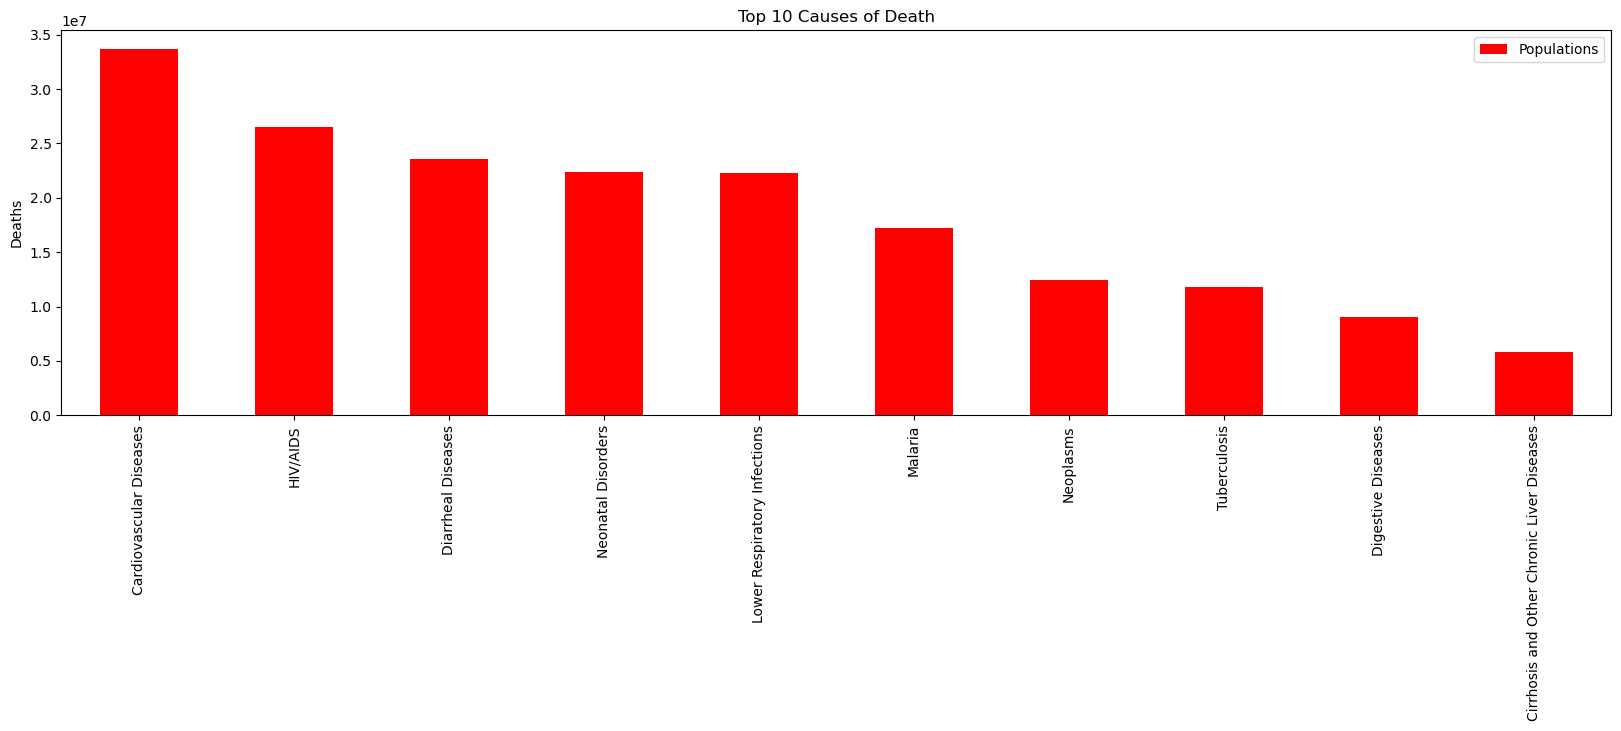

In [16]:
multi_plot = top_ten_causes.plot(kind="bar", figsize=(20,5), title="Top 10 Causes of Death", color = 'r')
multi_plot.set_ylabel('Deaths')

In [17]:
# analyze total cause of death over 30 years
df4 = Africa_death.groupby('Year').sum()
top_five_overyears = df4[['Cardiovascular Diseases','HIV/AIDS','Diarrheal Diseases',
                          'Neonatal Disorders','Lower Respiratory Infections']]
top_five_overyears 

,Cardiovascular Diseases,HIV/AIDS,Diarrheal Diseases,Neonatal Disorders,Lower Respiratory Infections
Year,,,,,
1990,842767,225147,944438,664677,777833
1991,858530,292697,960574,670406,778841
1992,878594,372240,944984,677752,784488
1993,898977,462804,936120,685991,785710
1994,920410,561986,947063,694003,788599
1995,936101,667069,936019,703193,791355
1996,956824,774030,931434,711488,788551
1997,985563,880951,920712,721288,789654
1998,1005841,986915,909689,731016,790526


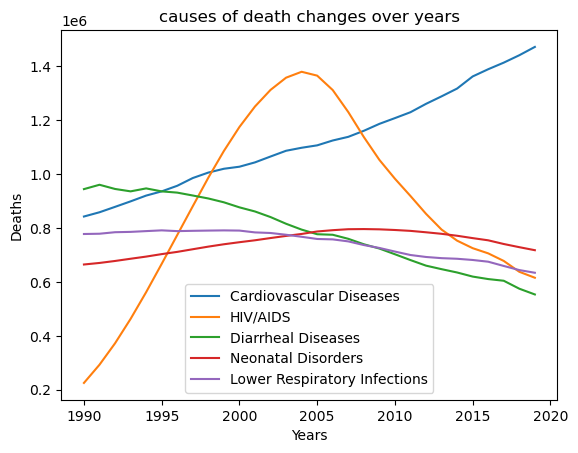

In [18]:
plt.plot(top_five_overyears)
plt.title("causes of death changes over years")
plt.xlabel("Years")
plt.ylabel("Deaths")
plt.legend(labels = ['Cardiovascular Diseases','HIV/AIDS','Diarrheal Diseases',
                     'Neonatal Disorders','Lower Respiratory Infections'], loc = "best")

In [19]:
plt.savefig("changes_over_years")
plt.show()

<Figure size 640x480 with 0 Axes>

In [20]:
# Top five countries with the highest number of deaths
df5 = Africa_death.groupby('Country/Territory').sum()
countries_df = df5[['Cardiovascular Diseases','HIV/AIDS','Diarrheal Diseases','Neonatal Disorders',
                    'Lower Respiratory Infections']].sort_values(['Cardiovascular Diseases'],ascending=False).head(5)
countries_df 

,Cardiovascular Diseases,HIV/AIDS,Diarrheal Diseases,Neonatal Disorders,Lower Respiratory Infections
Country/Territory,,,,,
Egypt,5995471,2784,498193,504806,954868
Nigeria,4176488,2216718,7449328,5262229,5917528
Morocco,2551096,17552,153225,400341,252563
South Africa,2234693,4874296,600313,674828,983661
Algeria,2123720,6101,34410,395714,179379


<AxesSubplot:title={'center':'Top 5 countries with the highest number of deaths'}, xlabel='Country/Territory', ylabel='Deaths'>

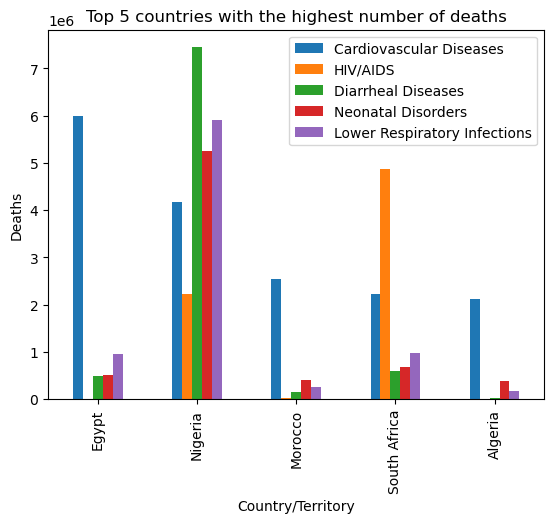

In [21]:
countries_df.plot(kind= 'bar',ylabel="Deaths",title="Top 5 countries with the highest number of deaths")
